<a href="https://colab.research.google.com/github/AndrewArnett/DS-Unit-1-Build/blob/master/Ramen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
from google.colab import files
import io
import numpy as np

In [4]:
uploaded = files.upload()

Saving datasets_9366_13206_ramen-ratings.csv to datasets_9366_13206_ramen-ratings.csv


In [5]:
df = pd.read_csv(io.StringIO(uploaded['datasets_9366_13206_ramen-ratings.csv'].decode('utf-8')))

print(df.shape)
df.head()

(2580, 7)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [6]:
df.nunique()

Review #    2580
Brand        355
Variety     2413
Style          7
Country       38
Stars         51
Top Ten       38
dtype: int64

In [23]:
df1 = df.replace({'Unrated': np.NaN})

print(df.shape)

(2580, 7)


In [26]:
df1[['Stars']] = df1[['Stars']].apply(pd.to_numeric)

df1.dtypes

Review #      int64
Brand        object
Variety      object
Style        object
Country      object
Stars       float64
Top Ten      object
dtype: object

In [28]:
df1['Stars'].value_counts()

4.000    393
5.000    386
3.750    350
3.500    335
3.000    176
3.250    170
4.250    143
4.500    135
2.750     85
2.000     68
2.500     67
4.750     64
1.500     37
1.750     27
1.000     26
0.000     26
2.250     21
0.500     14
0.250     11
1.250     10
4.300      4
3.800      3
2.900      2
2.800      2
3.100      2
2.300      2
1.100      2
4.125      2
3.650      1
3.600      1
3.700      1
3.400      1
3.125      1
2.850      1
0.100      1
1.800      1
3.200      1
2.100      1
3.300      1
2.125      1
0.750      1
0.900      1
Name: Stars, dtype: int64

In [29]:
crosstab = pd.crosstab(df1['Stars'], df['Country'])

crosstab

Country,Australia,Bangladesh,Brazil,Cambodia,Canada,China,Colombia,Dubai,Estonia,Fiji,Finland,Germany,Ghana,Holland,Hong Kong,Hungary,India,Indonesia,Japan,Malaysia,Mexico,Myanmar,Nepal,Netherlands,Nigeria,Pakistan,Philippines,Poland,Sarawak,Singapore,South Korea,Sweden,Taiwan,Thailand,UK,USA,United States,Vietnam
Stars,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000,0,0,0,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,4,0,1,7,0,1
0.100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0.250,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,2,0,0
0.500,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0,2,1,1,0,1
0.750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1.000,1,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,1,0,0,1,0,0,0,0,2,0,6,2,2,2,0,1
1.100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1.250,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,3


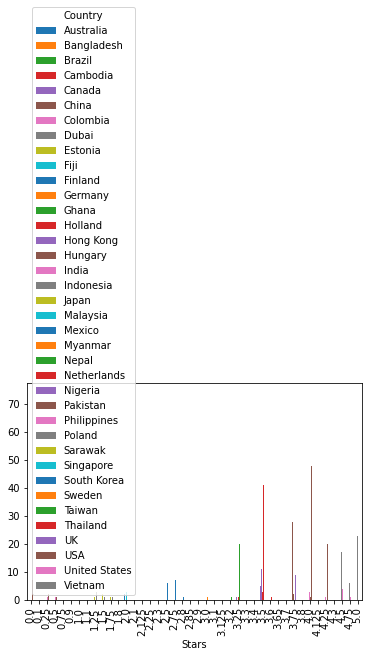

In [30]:
crosstab.plot(kind='bar');